**ALY6140 PYTHON AND ANALYTICS SYSTEM**

**DATASET: ADULT** 



In [2]:
#STEP 1 EDA 

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None

Descriptive Statistics:
                age      

/var/folders/2d/fdgfcmk51bb8fstt0lfln0700000gn/T/ipykernel_1069/312924281.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="income", palette="Set2")


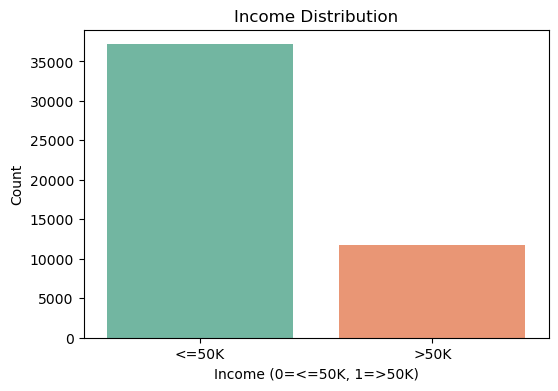

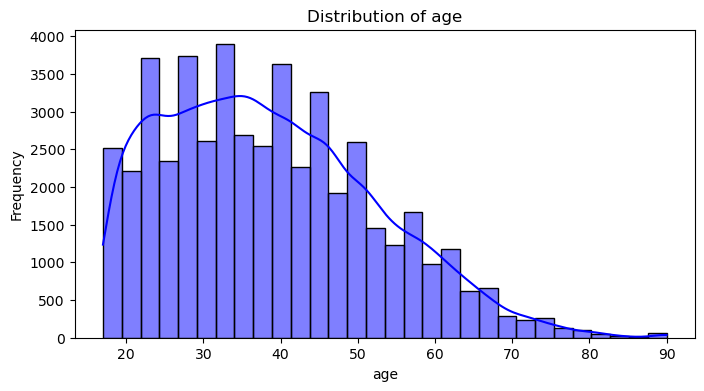

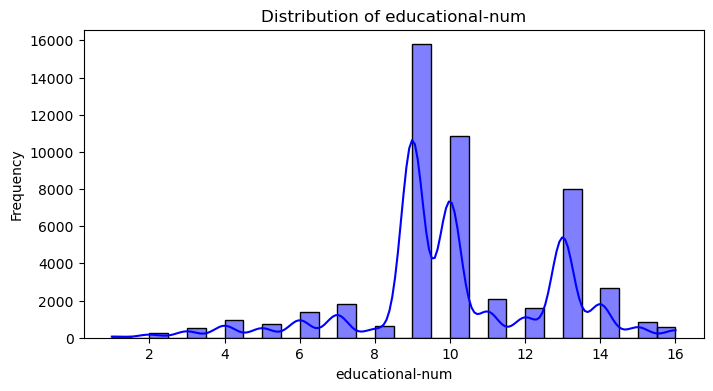

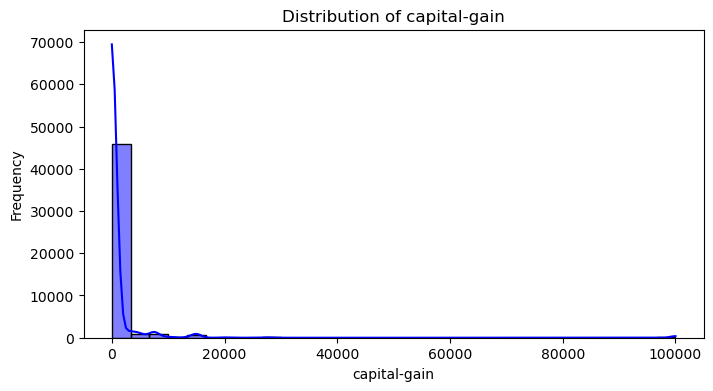

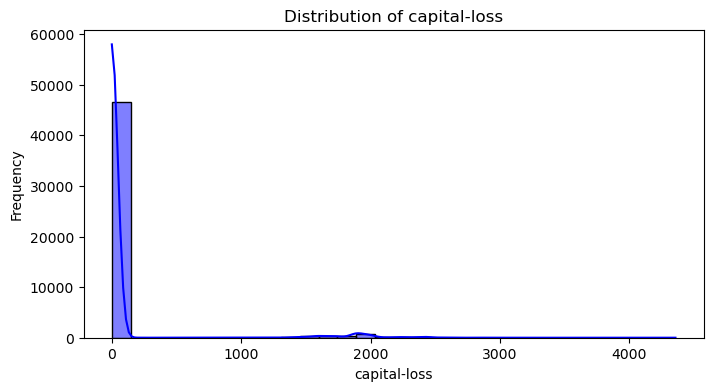

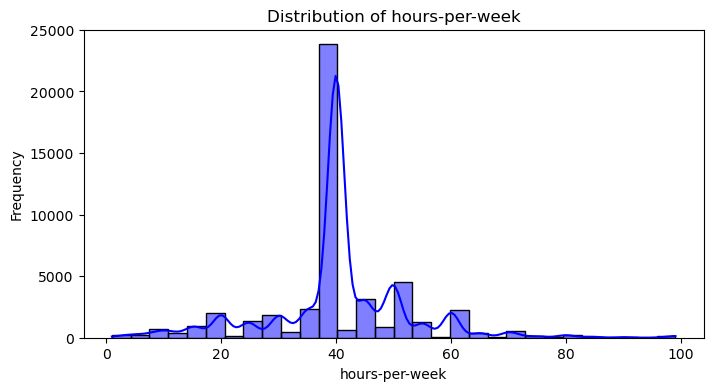

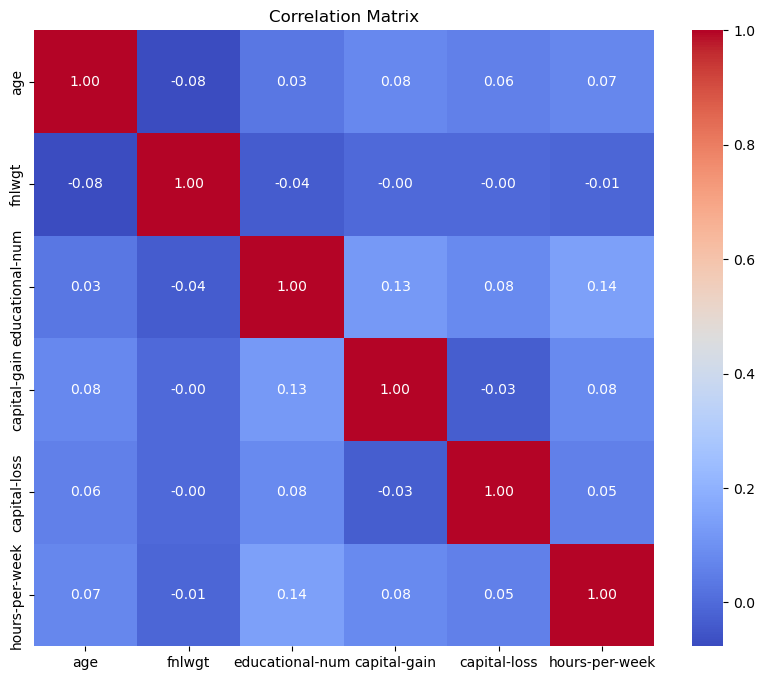

In [5]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors


# Load the dataset to perform EDA and clustering analysis
file_path = '/Users/pranulokhande/Downloads/adult.csv'
columns = ["age", "workclass", "education", "educational_num", "marital_status", 
           "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
           "hours_per_week", "native_country", "income"]

data = pd.read_csv(file_path)

# 1. Display basic information
print("Dataset Information:")
print(data.info())

# 2. Display basic statistics
print("\nDescriptive Statistics:")
print(data.describe())

# EDA: Numerical feature summary
numerical_features = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# 3. Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="income", palette="Set2")
plt.title("Income Distribution")
plt.xlabel("Income (0=<=50K, 1=>50K)")
plt.ylabel("Count")
plt.show()

#4 Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# 5. Correlation heatmap (only for numeric columns)
numeric_data = data.select_dtypes(include=["number"])  # Select only numeric columns
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


#K-MEANS CLUSTERING 

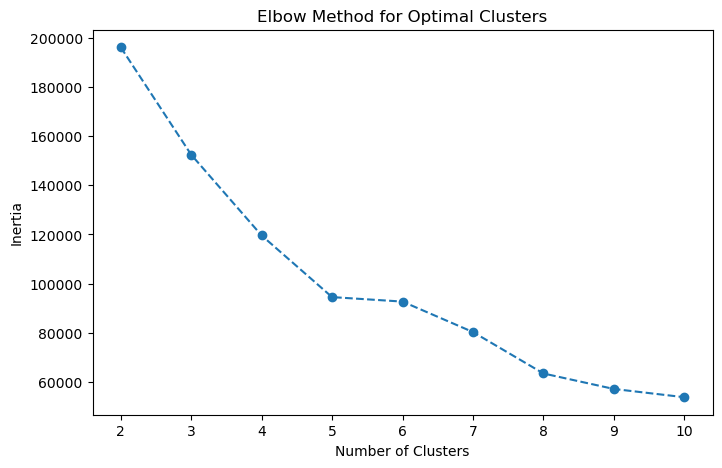

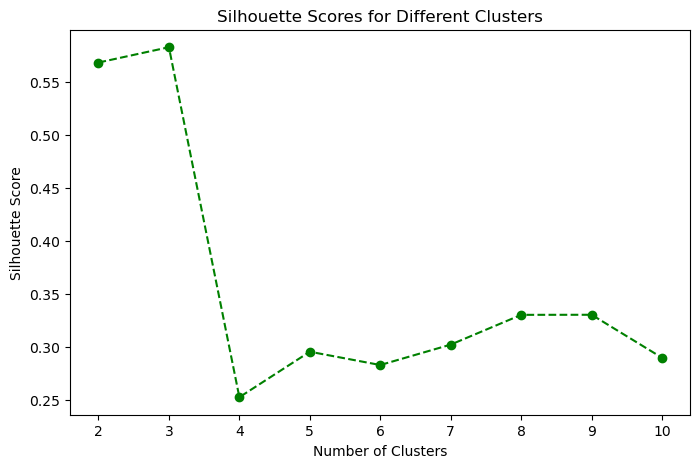

In [11]:
# Preprocessing: Standardize numerical features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_features])

# Elbow Method and Silhouette Scores
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='green')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
#TRAINING THE MDOEL 

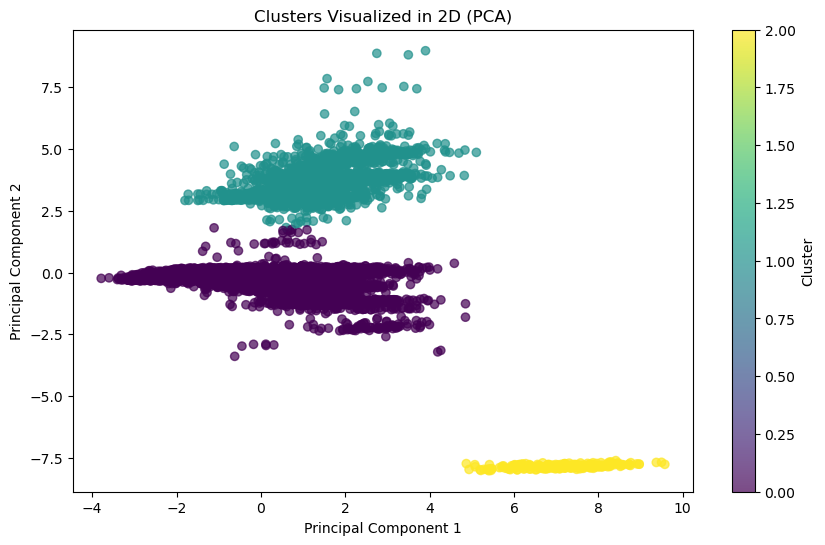

Cluster Characteristics:
                age  educational-num  capital-gain  capital-loss  \
Cluster                                                           
0        38.450302        10.018162    610.527718      0.543637   
1        41.778820        10.998213      0.000000   1898.384718   
2        46.610656        13.024590  99999.000000      0.000000   

         hours-per-week  
Cluster                  
0             40.228430  
1             43.344057  
2             50.475410  


In [7]:
# Train K-means with optimal number of clusters (e.g., 3 from elbow method)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Add cluster labels to the original dataset
data['Cluster'] = labels

# Visualize Clusters using PCA (2D projection)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('Clusters Visualized in 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Summary of Clusters
cluster_summary = data.groupby('Cluster')[numerical_features].mean()
print("Cluster Characteristics:\n", cluster_summary)

# Save the results with cluster labels
data.to_csv('adult_with_clusters.csv', index=False)

In [8]:
#LINEAR REGRESSION MODEL 


Test Set with Actual and Predicted Income:
       age  educational-num  hours-per-week  actual_income  predicted_income
7762    56                9              40              0                 0
23881   25                9              40              0                 0
30507   43               13              40              1                 0
28911   32                9              40              0                 0
19484   39               13              30              0                 0

Model Evaluation:
Mean Squared Error: 0.14671405434243628
R^2 Score: 0.18249028506395248


/var/folders/2d/fdgfcmk51bb8fstt0lfln0700000gn/T/ipykernel_2464/1398230454.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="income", y="hours-per-week", palette="Set2")


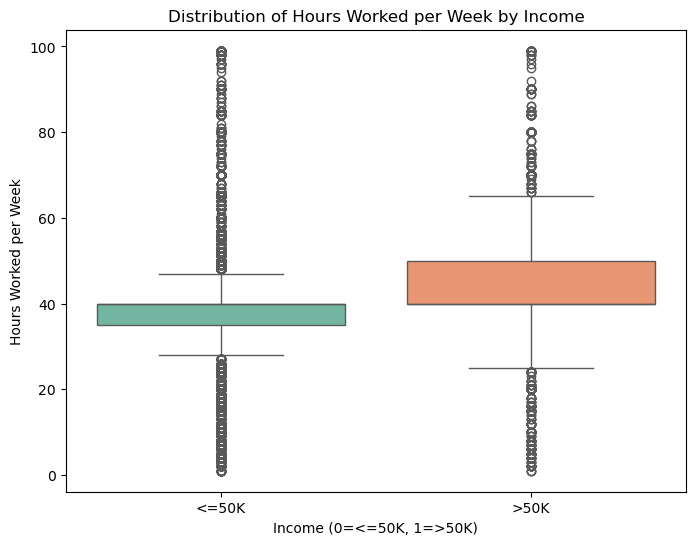

In [60]:
### Data Preprocessing and Modeling ###
# Correct column names based on the dataset
X = data[["age", "educational-num", "hours-per-week"]]  
y = data['income'] 

# Convert target variable 'income' to binary (0=<=50K, 1=>50K)
y = y.apply(lambda x: 1 if x.strip() == ">50K" else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Convert predictions to binary
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Create a new DataFrame with actual and predicted values
test_set_with_predictions = X_test.copy()
test_set_with_predictions['actual_income'] = y_test.values
test_set_with_predictions['predicted_income'] = y_pred_binary

# Show the updated test set with predictions
print("\nTest Set with Actual and Predicted Income:")
print(test_set_with_predictions.head())

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Box plot: Hours Worked per Week by Income
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="income", y="hours-per-week", palette="Set2")
plt.title("Distribution of Hours Worked per Week by Income")
plt.xlabel("Income (0=<=50K, 1=>50K)")
plt.ylabel("Hours Worked per Week")
plt.show()

In [ ]:
#KNN MODEL 

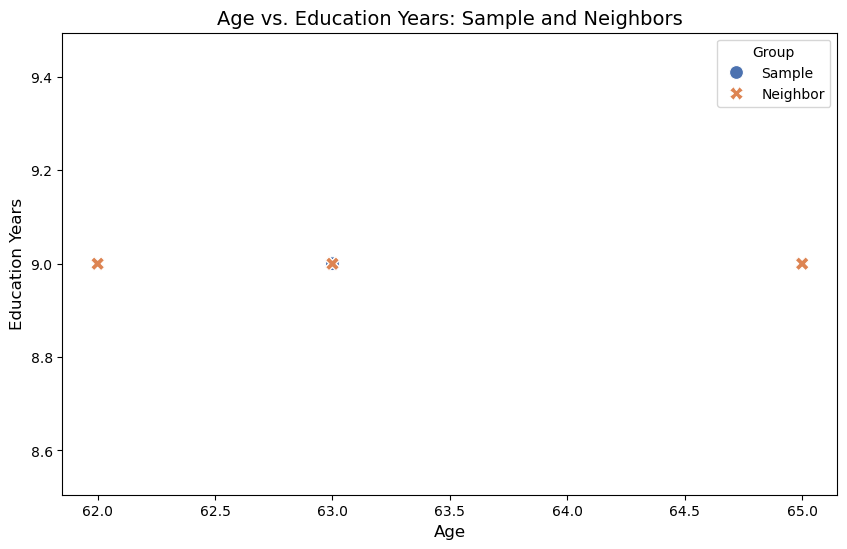

In [9]:

# Impute missing values with the most frequent value
imputer = SimpleImputer(strategy="most_frequent")
data_cleaned = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Retain the original 'age' column to avoid incorrect encoding
data_cleaned['age'] = data['age']

# Encode categorical variables
label_encoders = {}
for col in data_cleaned.select_dtypes(include="object").columns:
    encoder = LabelEncoder()
    data_cleaned[col] = encoder.fit_transform(data_cleaned[col])
    label_encoders[col] = encoder

# Scale the numerical features
numerical_features = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned[numerical_features])

# KNN Model
knn = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn.fit(X_scaled)

# Testing: Select a sample and find similar neighbors
sample_index = 1032  # Example index
sample = X_scaled[sample_index].reshape(1, -1)
distances, indices = knn.kneighbors(sample)

# Retrieve the sample and its neighbors
sample_individual = data_cleaned.iloc[sample_index]
neighbors = data_cleaned.iloc[indices[0]]

# Scatterplot of Sample vs. Neighbors: Age and Education Years
neighbors_indices = indices[0]
sample_and_neighbors = data_cleaned.iloc[[sample_index] + list(neighbors_indices)].copy()
sample_and_neighbors['Group'] = ['Sample'] + ['Neighbor'] * len(neighbors_indices)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sample_and_neighbors,
    x='age',
    y='educational-num',
    hue='Group',
    style='Group',
    s=100,
    palette='deep'
)
plt.title("Age vs. Education Years: Sample and Neighbors", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Education Years", fontsize=12)
plt.legend(title="Group")
plt.show()